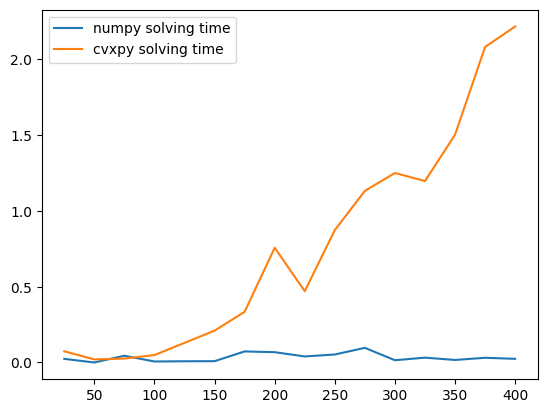

In [1]:
import numpy as np
import time
import cvxpy as cp
import matplotlib.pyplot as plt

np.random.seed(1)
numpy_time = []
cvxpy_time = []
num_of_variables = [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400]#,425,450,475,500]
for a in num_of_variables:
    mat = 10 * np.random.randn(a, a)
    sol = 10 * np.random.randn(a)
    t1 = time.time()
    solution = np.linalg.solve(mat, sol)
    numpy_time.append(time.time() - t1)

    x = cp.Variable(a)
    constraints = [mat @ x == sol]
    obj = cp.Minimize(cp.log_sum_exp(x))
    prob = cp.Problem(obj, constraints)
    t1 = time.time()
    prob.solve()
    cvxpy_time.append(time.time() - t1)

plt.plot(num_of_variables, numpy_time, label='numpy solving time')
plt.plot(num_of_variables, cvxpy_time, label='cvxpy solving time')
plt.legend()
plt.show()


[1.0]
[1.0, 1.0]
[1.0, 1.0, 0.8714285714285713]
[1.0, 1.0, 0.8714285714285713, 0.9666666666666668]
[1.0, 1.0, 0.8714285714285713, 0.9666666666666668, 0.93]
[1.0, 1.0, 0.8714285714285713, 0.9666666666666668, 0.93, 0.8636363636363636]
[1.0, 1.0, 0.8714285714285713, 0.9666666666666668, 0.93, 0.8636363636363636, 0.96]
[1.0, 1.0, 0.8714285714285713, 0.9666666666666668, 0.93, 0.8636363636363636, 0.96, 0.9633333333333333]
[1.0, 1.0, 0.8714285714285713, 0.9666666666666668, 0.93, 0.8636363636363636, 0.96, 0.9633333333333333, 0.9475324675324677]
[1.0, 1.0, 0.8714285714285713, 0.9666666666666668, 0.93, 0.8636363636363636, 0.96, 0.9633333333333333, 0.9475324675324677, 0.9357142857142857]
0.1


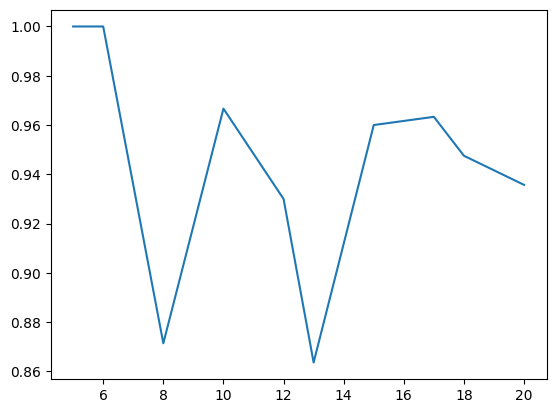

[0.9]
[0.9, 1.0]
[0.9, 1.0, 0.9199999999999999]
[0.9, 1.0, 0.9199999999999999, 0.9333333333333333]
[0.9, 1.0, 0.9199999999999999, 0.9333333333333333, 0.9380952380952381]
[0.9, 1.0, 0.9199999999999999, 0.9333333333333333, 0.9380952380952381, 0.8416666666666668]
[0.9, 1.0, 0.9199999999999999, 0.9333333333333333, 0.9380952380952381, 0.8416666666666668, 0.8714285714285713]
[0.9, 1.0, 0.9199999999999999, 0.9333333333333333, 0.9380952380952381, 0.8416666666666668, 0.8714285714285713, 0.8283333333333334]
[0.9, 1.0, 0.9199999999999999, 0.9333333333333333, 0.9380952380952381, 0.8416666666666668, 0.8714285714285713, 0.8283333333333334, 0.8755555555555556]


In [2]:
import networkx as nx
from networkx.algorithms import approximation as approx
import itertools as it
# import matplotlib.pyplot as plt

def exact_maximum_independent_set(G):
    set = []
    for l in range(1, G.number_of_nodes()+1):
        for t in it.combinations(G.nodes,l):
            is_independent = True
            for n in t:
                for k in G.adj[n].keys():
                    if k in t:
                        is_independent = False
                        break
            if is_independent:
                set = t
                break
    return set

probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
number_of_nodes = [5,6,8,10,12,13,15,17,18,20]
approximations_with_different_prob = []

for p in probabilities:
    approximations = []
    for n in number_of_nodes:
        approx_for_probability = []
        for i in range(5):
            G = nx.gnp_random_graph(n,p,directed=False)
            num_is = len(exact_maximum_independent_set(G))
            num_approx = len(approx.maximum_independent_set(G))
            approx_for_probability.append(num_approx/num_is)
        approximations.append((sum(approx_for_probability))/5)
        print(approximations)
    print(p)
    plt.plot(number_of_nodes, approximations)
    # plt.legend()
    plt.show()
    approximations_with_different_prob.append(approximations)
print(sum(approximations_with_different_prob)/len(approximations_with_different_prob))




